In [1]:
import sys, os
sys.path.append(os.pardir)

os.environ["KERAS_BACKEND"]='tensorflow'
#import glob
import numpy as np


weight_choice = input('Which weights to choose? 1:normal 2:lle(15,40)_(1000,20,300) 3:iso(15,40)_(1000,20,300) 4:lle(15,40)_(1000,20,150) 5:iso(15,40)_(1000,20,150)')



#from multiprocessing import Pool
#import multiprocessing as multi
#from data.func import load_npy, padding_mat
#sys.path.append('C:\\ProgramData\\Anaconda3\\pkgs\\pydot-1.2.3-py36hd4f83f9_0\\Lib\\site-packages')
#sys.path


path_to_15_40 = 'milnet+edu/data/Preprocessed/15words+40sent/'
path_to_20_50 = 'milnet+edu/data/Preprocessed/20words+50sent/'

path =path_to_15_40

x_train = np.load('/home/owner/デスクトップ/'+path+'train_data_features_sorted.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_train_sort.npy')
y_train = np.load('/home/owner/デスクトップ/'+path+'train_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_test_sort.npy')
#print(x_test)

x_test = np.load('/home/owner/デスクトップ/'+path+'test_data_features_sorted.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_train.npy')
y_test = np.load('/home/owner/デスクトップ/'+path+'test_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_test.npy')

x_valid = np.load('/home/owner/デスクトップ/'+path+'validation_data_features_sorted.npy')
y_valid = np.load('/home/owner/デスクトップ/'+path+'validation_data_scores_binary.npy')

#train_idx = np.load('/home/owner/デスクトップ/'+path+'train_data_idx_binary_only.npy')
#test_idx = np.load('/home/owner/デスクトップ/'+path+'test_data_idx_binary_only.npy')
#valid_idx = np.load('/home/owner/デスクトップ/'+path+'validation_data_idx_binary_only.npy')

#print(len(train_idx))
#x_train = x_train[train_idx]
#y_train = y_train[train_idx]
#print(len(x_train))
#print(len(y_train))

#x_test = x_test[test_idx]
#y_test = y_test[test_idx]

#x_valid = x_valid[valid_idx]
#y_valid = y_valid[valid_idx]

#print(x_valid)

#word_idx=np.load( '/home/owner/デスクトップ/'+ path +'vocab_idx.npy')
#print(idx)
#mani_choice = input('Which weights to choose? 1:normal 2:lle 3:iso ')
if (int(weight_choice)==1):
    embWeights=np.load( '/home/owner/デスクトップ/'+ path +'weights.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')
elif (int(weight_choice)==2):
    embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/manifold_weights/' + 'weights_LLE_(15,40)_(1000,20,300).npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')
elif (int(weight_choice)==3):
     embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/manifold_weights/' + 'weights_Isomap_(15,40)_(1000,20,300).npy')
elif (int(weight_choice)==4):
    embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/manifold_weights/' + 'weights_LLE20_1000_20_150.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')
elif (int(weight_choice)==5):
     embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/manifold_weights/' + 'weights_Isomap_20_1000_20_150.npy')

        
        
#print(len(word_idx))
print(y_test)

print('data loaded')



import keras
from keras.layers import Input, merge
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import keras.backend as K
from keras.layers import Lambda, regularizers, Average
from keras.layers import RepeatVector, Permute, Multiply

from keras.models import Model
from keras.layers import Input, Conv2D, Conv1D, MaxPooling2D, GlobalMaxPooling2D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras.layers.core import Dropout, Dense, Lambda, Masking
from keras.layers import merge, Layer, Activation, Dot, Concatenate, Flatten, Lambda

from keras.initializers import Identity,glorot_normal
from keras import regularizers

from keras import metrics

from keras.utils import plot_model


Which weights to choose? 1:normal 2:lle(15,40)_(1000,20,300) 3:iso(15,40)_(1000,20,300) 4:lle(15,40)_(1000,20,150) 5:iso(15,40)_(1000,20,150)5
[0 0 0 ... 1 1 1]
data loaded


/home/owner/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/owner/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


li = [x_train.tolist(), x_test.tolist(), x_valid.tolist()]
for idx in range(3):
    features = li[idx]
    print(len(features))
    for i in range(len(features)):
        #print(len(features[i]))
        if len(features[i])!=40:
                print('i:'+str(i)+'   ;;;;;;;;;;;;;;;;;;;;;')
                print(len(features[i]))
                li[idx][i].append(li[idx][i][-1])
        for j in range(len(features[i])):

            #print(len(features[i][j]))
            if len(features[i][j])!= 15:
                print('i:'+str(i)+'j:'+str(j)+'   *************************')

x_train=np.asarray(li[0])
x_test=np.asarray(li[1])
x_valid=np.asarray(li[2])

In [2]:
print(x_train.shape, x_test.shape, x_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

(210642, 40, 15) (25510, 40, 15) (25206, 40, 15)
(210642,) (25510,) (25206,)


In [3]:
numSentencesPerDoc, numWordsPerSentence = x_train[0].shape[0], x_train[0].shape[1]
print(numSentencesPerDoc, numWordsPerSentence)
#print(x_train[0])

vocabSize, embeddingSize = embWeights.shape[0], embWeights.shape[1]
print(vocabSize, embeddingSize)

dropWordEmb = 0.25
recursiveClass = GRU

filters = 100 #embeddingSize*2
windowMin = 3
windowMax = 7# dimOfSentimentMetrics = 5
batch_size = 200
#epochs = 25
dimGRU = 50
numDensePool=10
eta = 1e-4
dr = 0.5

##

#wordsInputs = Input(shape=(numWordsPerSentence,1), batch_shape=(numSentencesPerDoc,numWordsPerSentence,), dtype='int32', name='words_input')

x_in = Input( shape = ( numSentencesPerDoc, numWordsPerSentence ) , name='Input' )
#x_pop = Lambda( lambda x: x, output_shape=(numWordsPerSentence, ) , name='convert_shape' )( x_in )
    
#Layer functionの定義
embLayer = Embedding( input_dim=embWeights.shape[0], output_dim=embWeights.shape[1], weights=[embWeights]
                      ,mask_zero=False , trainable=False, embeddings_regularizer=regularizers.l2(0.0000001)
                      , input_length=numWordsPerSentence, name='Embedding' )

maxPooledPerDoc = []
convNets = []
maxPools = []
scoresForSentences = []


extraDimLayer = Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo')
squeezeThirdLayer = Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer')

for windowSize in range(windowMin,windowMax):
    name='word_mat_convo_win_size_'+str(windowSize)
    #convNet = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', activation='relu'
    #                 ,strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",kernel_initializer=glorot_normal()
    #                 ,bias_regularizer=regularizers.l2(eta), kernel_regularizer=regularizers.l2(eta),name=name)
    convNet = Conv1D(filters=filters, kernel_size=windowSize, padding='valid', activation='relu', strides=1,use_bias=False,
                    kernel_regularizer=regularizers.l2(eta), name = name)
    convNets.append(convNet)
    name='word_mat_max_pool_win_size_'+str(windowSize)
    maxPool = MaxPooling1D(pool_size = int(numWordsPerSentence-windowSize-1), padding='valid')
    maxPools.append(maxPool)
    
    
for i in range(numSentencesPerDoc):
    maxPooledPerSentence = []
    x_pop = Lambda(lambda x: x[:,i], output_shape=(numWordsPerSentence, ) , name='convert_shape_'+'sentence'+str(i+1))( x_in )

    for j in range(windowMax-windowMin):   
        emb = embLayer(x_pop)
        #emb = Dropout(dr,name='DropEmb'+str(i)+str(j))(emb)
        #reshaped = extraDimLayer(emb)#Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo_'+str(j)+'_sentence_'+str(i))(emb)
        #name='word_mat_convo_win_size_'+str(j)+'_sentence_'+str(i)
        #wordsCNN = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', 
        #                    activation='relu', strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",
        #                    kernel_initializer=glorot_normal(),kernel_regularizer=regularizers.l2(),name=name)(reshaped)
        wordsCNN  = convNets[j](emb)
        wordsCNN = Dropout(dr,name='DropCNN'+str(i)+str(j))(wordsCNN)
        #squeezed = squeezeThirdLayer(wordsCNN)#Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer_'+str(j)+'_sentence_'+str(i))(wordsCNN)
        # newShape = (-1, int(squeezed.shape[1])*int(squeezed.shape[2]))
        # squeezed = Lambda(lambda x: K.reshape(x,shape=newShape), name ='squeezeDimForMaxPool'+str(i)+str(j))(squeezed)
        #wordsCNNPooled=GlobalMaxPooling1D()(squeezed)
        #wordsCNNPooled= MaxPooling1D(pool_size = int(squeezed.shape[1]), padding='valid')(squeezed)
        wordsCNNPooled = MaxPooling1D(pool_size=(numWordsPerSentence-(j+windowMin)+1))(wordsCNN)
        flattened = Lambda(lambda x: K.squeeze(x, 1))(wordsCNNPooled)
        maxPooledPerSentence.append(flattened)
        
    mergedPoolForSentence = Concatenate(axis = 1)(maxPooledPerSentence)
    newShape=(-1,1,int(mergedPoolForSentence.shape[1]))
    reshapedPoolForSentence = Lambda(lambda x: K.reshape(x,shape=newShape), name ='switch_axis_'+'sentence'+str(i+1)+'winSize'+str(j+windowMin))(mergedPoolForSentence)
    maxPooledPerDoc.append(reshapedPoolForSentence)
    
    densePoolForSentence = Dense(numDensePool, bias_regularizer=regularizers.l2(eta),
                                 kernel_regularizer=regularizers.l2(eta), activation='softmax', use_bias=True)(reshapedPoolForSentence)

    densePoolForSentence = Dropout(dr,name='DropDense'+str(i))(densePoolForSentence)
    scoresForSentences.append(densePoolForSentence)
    
#Naive Approach
averaged = Average()(scoresForSentences) 
averaged = Lambda(lambda x:K.reshape(x,shape=(-1,int(averaged.shape[1])*int(averaged.shape[2]))), name ='attend_output')(averaged)
out_avg = Dense(1, activation='sigmoid', use_bias=True)(averaged) 
    
#Apply Attention 
mergedPoolPerDoc = Concatenate(axis = 1)(maxPooledPerDoc)
biRnn_ = Bidirectional(GRU(dimGRU,  return_sequences=True), merge_mode='concat')(mergedPoolPerDoc)
newShape = (-1, int(mergedPoolPerDoc.shape[1]), int(biRnn_.shape[2]))
biRnn = Lambda(lambda x: K.reshape(x,shape=newShape), name ='biRnn_TF_Reminder1')(biRnn_)
#biRnn2 = Lambda(lambda x: K.reshape(x,shape=newShape), name ='biRnn_TF_Reminder2')(biRnn_[1])

#biRnn_cat = Concatenate(axis = 2)([biRnn1, biRnn2])

CONTEXT_DIM = 100

#eij = Dense(CONTEXT_DIM, use_bias=True, activation='tanh')(biRnn)
#eij = Dense(1, use_bias=False, activation='softmax')(eij)

#weighted_input = Dot(axes = 1)([eij, mergedPoolPerDoc])
#weighted_input = Lambda(lambda x: K.reshape(x,shape=(-1,int(weighted_input_.shape[1])*int(weighted_input_.shape[2]))), name ='attend_output')(weighted_input_)
eij_ = Dense(CONTEXT_DIM, use_bias=True, activation='tanh')(biRnn)
eij = Dense(1, use_bias=False, name = 'attention_weights',bias_regularizer=regularizers.l2(eta),
                                 kernel_regularizer=regularizers.l2(eta))(eij_)
eij_permuted = Permute((2,1))(eij)
eij_normalized = Activation('softmax',name = 'attention_softmax')(eij_permuted)
eij_normalized = Permute((2,1))(eij_normalized)

scoresPerDoc = Concatenate(axis = 1)(scoresForSentences)
weighted_input = Dot(axes = 1)([eij, scoresPerDoc])
#weighted_input = Lambda(lambda x: K.reshape(x,shape=(-1,int(weighted_input_.shape[1])*int(weighted_input_.shape[2]))), name ='attend_output')(weighted_input_)
weighted_input = Lambda(lambda x: K.squeeze(x, 1), name='squeezeOutput')(weighted_input)

out = Dense(1, activation='sigmoid', use_bias=True)(weighted_input)

##

model = Model(input=[x_in], output=[out])#,weighted_input,eij_normalized])
#adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
#model.compile(loss='binary_crossentropy',
#              optimizer=adadelta,
#              metrics=['accuracy'])
         
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

print("Attention Model Build Complete")
##
#model_avg = Model(inputs=[x_in], outputs=[out_avg])
#model_avg.compile(loss='binary_crossentropy',
#              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#              metrics=['accuracy'])

#print("Average Model Build Complete")
##
#save model to png file
#from keras.utils import plot_model
#plot_model( model, to_file='model.png' )

#モデルを保存せず直接可視化
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG( model_to_dot( model ).create( prog='dot', format='svg' ) )


40 15
61560 150


/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:126: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Attention Model Build Complete


In [4]:
embWeights.shape

(61560, 300)

In [4]:
save_model_path = '/home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso_150.hdf5'


In [5]:
#name = './params_milnet_adam_0720_3_adjCNN_fixed_weights.hdf5'
save_model = keras.callbacks.ModelCheckpoint(save_model_path, monitor='val_loss', verbose=1
                                             , save_best_only=True, save_weights_only=True, mode='min', period=1)

In [6]:
history_normal = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=10 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/10
210642/210642 [==============================] - 371s 2ms/step - loss: 0.5124 - acc: 0.8433 - val_loss: 0.4127 - val_acc: 0.8733

Epoch 00001: val_loss improved from inf to 0.41273, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_normal.hdf5
Epoch 2/10
210642/210642 [==============================] - 358s 2ms/step - loss: 0.4039 - acc: 0.8746 - val_loss: 0.3810 - val_acc: 0.8817

Epoch 00002: val_loss improved from 0.41273 to 0.38096, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_normal.hdf5
Epoch 3/10
210642/210642 [==============================] - 357s 2ms/step - loss: 0.3815 - acc: 0.8828 - val_loss: 0.3772 - val_acc: 0.8836

Epoch 00003: val_loss improved from 0.38096 to 0.37716, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_normal.hdf5
Epoch 4/10
210

In [6]:
history_LLE = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=10 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/10
210642/210642 [==============================] - 370s 2ms/step - loss: 0.4027 - acc: 0.8455 - val_loss: 0.3453 - val_acc: 0.8667

Epoch 00001: val_loss improved from inf to 0.34525, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_lle.hdf5
Epoch 2/10
210642/210642 [==============================] - 360s 2ms/step - loss: 0.3383 - acc: 0.8720 - val_loss: 0.3363 - val_acc: 0.8706

Epoch 00002: val_loss improved from 0.34525 to 0.33633, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_lle.hdf5
Epoch 3/10
210642/210642 [==============================] - 359s 2ms/step - loss: 0.3273 - acc: 0.8796 - val_loss: 0.3332 - val_acc: 0.8822

Epoch 00003: val_loss improved from 0.33633 to 0.33320, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_lle.hdf5
Epoch 4/10
210642/21064

In [7]:
model.load_weights(save_model_path)#('./params_milnet_adam_0718_2_fixed_weights.hdf5')

In [6]:
history_ISO = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=15 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/15
210642/210642 [==============================] - 360s 2ms/step - loss: 0.5562 - acc: 0.8407 - val_loss: 0.4690 - val_acc: 0.8724

Epoch 00001: val_loss improved from inf to 0.46901, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso.hdf5
Epoch 2/15
210642/210642 [==============================] - 356s 2ms/step - loss: 0.4566 - acc: 0.8718 - val_loss: 0.4689 - val_acc: 0.8673

Epoch 00002: val_loss improved from 0.46901 to 0.46895, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso.hdf5
Epoch 3/15
210642/210642 [==============================] - 355s 2ms/step - loss: 0.4408 - acc: 0.8777 - val_loss: 0.4454 - val_acc: 0.8759

Epoch 00003: val_loss improved from 0.46895 to 0.44541, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso.hdf5
Epoch 4/15
210642/21064

In [7]:
history_LLE_150 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=10 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/10
210642/210642 [==============================] - 310s 1ms/step - loss: 0.4063 - acc: 0.8379 - val_loss: 0.3432 - val_acc: 0.8619

Epoch 00001: val_loss improved from inf to 0.34322, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_lle_150.hdf5
Epoch 2/10
210642/210642 [==============================] - 302s 1ms/step - loss: 0.3367 - acc: 0.8682 - val_loss: 0.3911 - val_acc: 0.8379

Epoch 00002: val_loss did not improve
Epoch 3/10
210642/210642 [==============================] - 303s 1ms/step - loss: 0.3251 - acc: 0.8749 - val_loss: 0.3226 - val_acc: 0.8754

Epoch 00003: val_loss improved from 0.34322 to 0.32265, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_lle_150.hdf5
Epoch 4/10
210642/210642 [==============================] - 302s 1ms/step - loss: 0.3187 - acc: 0.8790 - val_loss: 0.3203 - val_acc: 0.8776

Epoch

In [6]:
history_iso_150 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=10 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/10
210642/210642 [==============================] - 319s 2ms/step - loss: 0.6279 - acc: 0.8103 - val_loss: 0.5169 - val_acc: 0.8533

Epoch 00001: val_loss improved from inf to 0.51690, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso_150.hdf5
Epoch 2/10
210642/210642 [==============================] - 308s 1ms/step - loss: 0.4655 - acc: 0.8637 - val_loss: 0.4550 - val_acc: 0.8617

Epoch 00002: val_loss improved from 0.51690 to 0.45500, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso_150.hdf5
Epoch 3/10
210642/210642 [==============================] - 308s 1ms/step - loss: 0.4355 - acc: 0.8704 - val_loss: 0.4414 - val_acc: 0.8655

Epoch 00003: val_loss improved from 0.45500 to 0.44143, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_iso_150.hdf5
Epoch 4/10


In [12]:
#plot history
import matplotlib.pyplot as plt
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
    

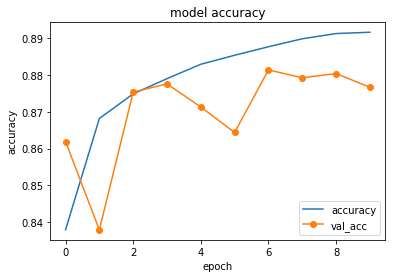

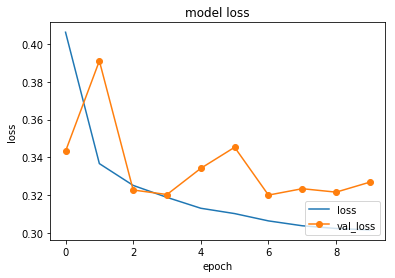

In [13]:
plot_history(history_LLE_150)

In [6]:
save_model_path = '/home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001/params_adadelta_normal_0.3775_0.8758 .hdf5'
model.load_weights(save_model_path)#('./params_milnet_adam_0718_2_fixed_weights.hdf5')

In [8]:
score=model.evaluate(x_test, y_test)

25510/25510 [==============================] - 41s 2ms/step


In [9]:
print(score[0],score[1])

0.4227306628101062 0.8759310074433866


In [7]:
model.predict_on_batch(x_test[0:1])

[array([[0.40012848]], dtype=float32),
 array([[0.6205897, 2.111729 ]], dtype=float32),
 array([[[0.02356183],
         [0.02389398],
         [0.02303003],
         [0.02404708],
         [0.02569389],
         [0.02561416],
         [0.02533291],
         [0.03182819],
         [0.02493797],
         [0.02865283],
         [0.02856121],
         [0.0262622 ],
         [0.02646551],
         [0.0251376 ],
         [0.02556333],
         [0.02705708],
         [0.02521041],
         [0.02292651],
         [0.0250116 ],
         [0.02391998],
         [0.0237686 ],
         [0.02430354],
         [0.0236428 ],
         [0.0223533 ],
         [0.02212404],
         [0.02369267],
         [0.0234232 ],
         [0.02344516],
         [0.02242457],
         [0.02308172],
         [0.02456088],
         [0.02442872],
         [0.02332065],
         [0.02344203],
         [0.02532757],
         [0.02888473],
         [0.02595239],
         [0.02586877],
         [0.02668209],
         [0.026

/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


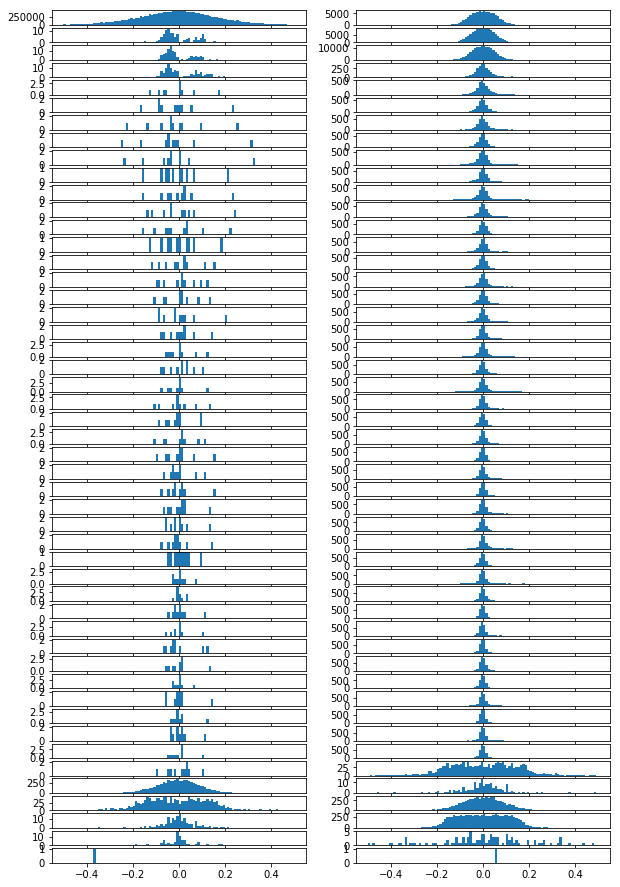

In [42]:
##
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_weights(w):
    l = len(w)
    fig = plt.figure(figsize=(10,16))
    gs = gridspec.GridSpec(int(l/2+1),2)
    
    for i in range(l):
        j = int( i/2 )
        k = i%2
        if k==0:
            ax = plt.subplot(gs[j,k])
            ax.hist( w[i].flatten() ,bins=100 ,range=(-0.5,0.5) )
            #ax.set_title(title[i])
        else:
            ax = plt.subplot(gs[j,k])
            ax.hist( w[i].flatten() ,bins=100 ,range=(-0.5,0.5) )
            #ax.set_title(title[i])
    plt.show()

save_model_path = '/home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/params_adadelta_normal 0.489.hdf5'
model_test = Model(input=[x_in], output=[out,eij_normalized])
model_test.load_weights(save_model_path)
plot_weights(model_test.get_weights())
##

In [43]:
model.get_layer('dense_43').get_weights()

[array([[ 0.00613822, -0.01595823, -0.01638355, ..., -0.09339832,
          0.23449233, -0.0163934 ],
        [ 0.00570766, -0.01440853, -0.01028535, ...,  0.06878978,
          0.02321846,  0.01221276],
        [-0.00955735,  0.07102745,  0.05873981, ..., -0.04907799,
         -0.11747277,  0.03790778],
        ...,
        [-0.01039937, -0.03331398, -0.03901637, ...,  0.07031082,
          0.09033212, -0.02839166],
        [-0.01678702,  0.02661383, -0.0132541 , ...,  0.0219114 ,
         -0.02555005, -0.00124587],
        [-0.00696072, -0.00591729, -0.00442338, ...,  0.14777248,
         -0.08882821,  0.00289663]], dtype=float32),
 array([-0.08097516,  0.00817164, -0.05212835,  0.00857434,  0.01582111,
         0.00218245, -0.12096858,  0.06406359,  0.17368901, -0.06494537],
       dtype=float32)]

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 40, 15)       0                                            
__________________________________________________________________________________________________
convert_shape_sentence1 (Lambda (None, 15)           0           Input[0][0]                      
__________________________________________________________________________________________________
convert_shape_sentence2 (Lambda (None, 15)           0           Input[0][0]                      
__________________________________________________________________________________________________
convert_shape_sentence3 (Lambda (None, 15)           0           Input[0][0]                      
__________________________________________________________________________________________________
convert_sh

In [14]:
history_normal2 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, initial_epoch=10,epochs=15 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 11/15
210642/210642 [==============================] - 358s 2ms/step - loss: 0.3641 - acc: 0.8926 - val_loss: 0.3600 - val_acc: 0.8914

Epoch 00011: val_loss improved from 0.36792 to 0.35997, saving model to /home/owner/デスクトップ/milnet+edu/results/0724 (15,40)/lr = 0.001 with 10 units/params_adam_normal.hdf5
Epoch 12/15
210642/210642 [==============================] - 357s 2ms/step - loss: 0.3576 - acc: 0.8961 - val_loss: 0.3766 - val_acc: 0.8849

Epoch 00012: val_loss did not improve
Epoch 13/15
210642/210642 [==============================] - 358s 2ms/step - loss: 0.3558 - acc: 0.8977 - val_loss: 0.3654 - val_acc: 0.8908

Epoch 00013: val_loss did not improve
Epoch 14/15
210642/210642 [==============================] - 357s 2ms/step - loss: 0.3534 - acc: 0.9001 - val_loss: 0.3656 - val_acc: 0.8932

Epoch 00014: val_loss did not improve
Epoch 15/15
210642/210642 [==============================] - 358s 2ms/step - loss: 0.3519 - acc